In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Network in Network

Cargamos los datos a utilizar para las visualizaciones

In [22]:
data_nin = [
    [r'$AM$', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    [r'$G_{max}^{a,b}$', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    [r'$G_{prod}^{a,b}$', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711],
    [r'$G_{ob}$', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697],
    [r'$G_{geom}$', 0.8671, 0.8674, 0.8692, 0.8671, 0.8634],
    [r'$G_{u}$', 0.8613, 0.8646, 0.8656, 0.8587, 0.8665],
    # ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    # ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.873, 0.8719, 0.8682, 0.8691, 0.8698],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716],
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.88, 0.8735, 0.872, 0.8729, 0.8782],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8732, 0.877, 0.8754, 0.8728, 0.8741],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8747, 0.8779, 0.8774, 0.875, 0.8728],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8741, 0.874, 0.879, 0.8756, 0.8749],

    [r'$G_{max}^{* a, b}$', 0.8701, 0.8722, 0.868, 0.8674, 0.8681],
    [r'$G_{prod}^{* a, b}$', 0.8796, 0.8838, 0.8825, 0.882, 0.8784],
    [r'$G_{geom}^{* a, b}$', 0.8757, 0.8774, 0.8784, 0.8757, 0.8799],
]

df = pd.DataFrame(data=data_nin, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

print(df)
print(df.T)

                                                     Test1   Test2   Test3  \
Model                                                                        
$AM$                                                0.8584  0.8661  0.8602   
$G_{max}^{a,b}$                                     0.8658  0.8682  0.8606   
$G_{prod}^{a,b}$                                    0.8750  0.8714  0.8735   
$G_{ob}$                                            0.8735  0.8798  0.8739   
$G_{geom}$                                          0.8671  0.8674  0.8692   
$G_{u}$                                             0.8613  0.8646  0.8656   
$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$       0.8730  0.8719  0.8682   
$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$     0.8821  0.8716  0.8789   
$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$      0.8746  0.8799  0.8766   
$AW_{(G_{max}^{a, b}, G_{prod}^{a, b}, G_{ob}^{...  0.8713  0.8762  0.8766   
$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a,...  0.8800  0.87

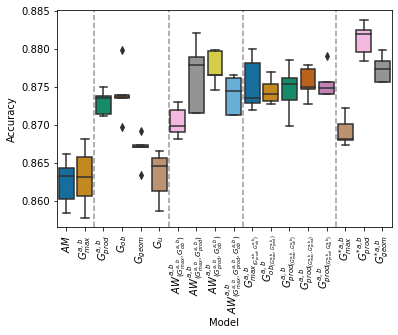

In [36]:
fig = plt.figure()
ax = sns.boxplot(data=df.T, palette='colorblind')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

plt.axvline(x=1.5, color='black', linestyle='--', alpha=0.4)
plt.axvline(x=5.5, color='black', linestyle='--', alpha=0.4)
plt.axvline(x=9.5, color='black', linestyle='--', alpha=0.4)
plt.axvline(x=14.5, color='black', linestyle='--', alpha=0.4)

Guardamos los plots generados en la carpeta reports/plots

In [37]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')

PATH_plots = os.path.join(PATH_REPORTS, 'plots')
try:
    os.mkdir(PATH_plots)
except FileExistsError as e:
    pass

fig.savefig(os.path.join(PATH_plots, 'groupings_boxplots.pdf'), bbox_inches="tight")

# Comparación entre gráficas de entrenamiento

Nota: Vamos a cargar los datos a partir del formato exportado por TensorBoard

In [5]:
import os
PATH_REPORTS = os.path.join('..', '..', 'reports')
PATH_plots = os.path.join(PATH_REPORTS, 'plots')
PATH_log_data = os.path.join(PATH_REPORTS, 'log_data')

Cargamos los datos exportados por tensorboard en formato csv

In [6]:
test_log_folder = os.path.join(PATH_log_data, 'best_methods')
data_names = []
data = []
for log_file in os.listdir(test_log_folder):
    data_names.append(log_file)
    data.append(pd.read_csv(os.path.join(test_log_folder, log_file)))

In [7]:
print(data_names)
print(data[0]['Value'].values)

data_names = ['max', 'g_ob', 'g_prod']


['run-nin_pool_max_100epochs_test_0-tag-acc_val.csv', 'run-nin_pool_grouping_ob_100epochs_test_0-tag-acc_val.csv', 'run-nin_pool_grouping_product_100epochs_test_0-tag-acc_val.csv']
[0.2563     0.35550001 0.47729999 0.49559999 0.56650001 0.58420002
 0.59710002 0.63510001 0.65630001 0.68769997 0.67720002 0.7238
 0.73379999 0.73930001 0.73940003 0.7493     0.7651     0.76069999
 0.77569997 0.77999997 0.80049998 0.78030002 0.7676     0.80659997
 0.8075     0.80860001 0.80800003 0.81389999 0.79149997 0.82529998
 0.81940001 0.81819999 0.8211     0.82279998 0.82609999 0.82980001
 0.8283     0.83310002 0.82230002 0.83579999 0.82740003 0.82849997
 0.82679999 0.81889999 0.83999997 0.84149998 0.82980001 0.82959998
 0.83950001 0.83209997 0.84179997 0.84259999 0.84930003 0.85589999
 0.85680002 0.85420001 0.85659999 0.85530001 0.85030001 0.84729999
 0.84990001 0.85350001 0.85470003 0.85829997 0.86080003 0.85589999
 0.85280001 0.85570002 0.85750002 0.861      0.86210001 0.85900003
 0.8617     0.85909

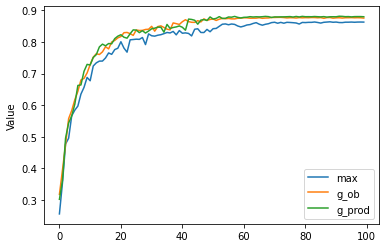

In [94]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training.pdf'))

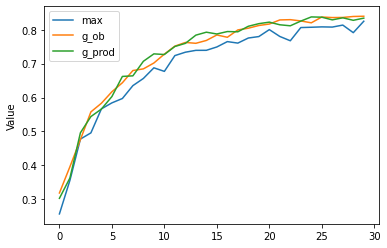

In [95]:
fig = plt.figure()
for data_model in data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs.pdf'))

In [80]:
soft_data = []
for data_model in data:
    copy_data = data_model
    copy_data['Value'] = copy_data['Value'].ewm(alpha=0.6).mean()
    soft_data.append(copy_data)
print(soft_data)

[       Wall time  Step     Value
0   1.633351e+09     0  0.256300
1   1.633351e+09     1  0.327157
2   1.633351e+09     2  0.423403
3   1.633351e+09     3  0.467859
4   1.633351e+09     4  0.527656
..           ...   ...       ...
95  1.633353e+09    95  0.862476
96  1.633353e+09    96  0.862250
97  1.633353e+09    97  0.862520
98  1.633353e+09    98  0.862688
99  1.633353e+09    99  0.862635

[100 rows x 3 columns],        Wall time  Step     Value
0   1.633178e+09     0  0.318100
1   1.633178e+09     1  0.373457
2   1.633178e+09     2  0.439062
3   1.633178e+09     3  0.512053
4   1.633178e+09     4  0.555122
..           ...   ...       ...
95  1.633182e+09    95  0.876523
96  1.633182e+09    96  0.876329
97  1.633182e+09    97  0.876432
98  1.633182e+09    98  0.876293
99  1.633182e+09    99  0.875637

[100 rows x 3 columns],        Wall time  Step     Value
0   1.633152e+09     0  0.302400
1   1.633152e+09     1  0.345186
2   1.633152e+09     2  0.441797
3   1.633152e+09     3  0

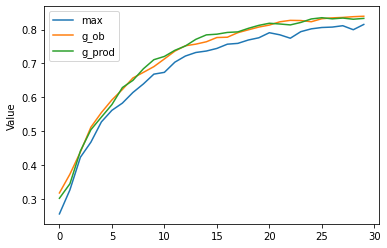

In [85]:
fig = plt.figure()
for data_model in soft_data:
    sns.lineplot(data=data_model['Value'][:30])
plt.legend(labels=data_names)
plt.savefig(os.path.join(PATH_plots, 'training30epochs_soft.pdf'))

## RESNet

In [4]:
data_resnet = [
    [r'$baseline$', 0.8206, 0.8161, 0.8168, 0.8239, 0.8129],
    [r'$AM$', 0.8522, 0.8476, 0.8435, 0.8499, 0.8524],
    [r'$G_{max}^{a,b}$', 0.8359, 0.7737, 0.834, 0.8343, 0.8263],
    [r'$G_{geom}^{a,b}$', 0.8545, 0.8438, 0.8469, 0.8399, 0.8487],
    [r'$G_{u}^{a,b}$', 0.8111, 0.8323, 0.7797, 0.8349, 0.8365],
    [r'$G_{prod}^{a,b}$', 0.7167, 0.7712, 0.7804, 0.689, 0.7384],
    [r'$G_{ob}^{a,b}$', 0.7516, 0.806, 0.8008, 0.7342, 0.7509]
]

df = pd.DataFrame(data=data_resnet, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

print(df)

                   Test1   Test2   Test3   Test4   Test5
Model                                                   
$baseline$        0.8206  0.8161  0.8168  0.8239  0.8129
$AM$              0.8522  0.8476  0.8435  0.8499  0.8524
$G_{max}^{a,b}$   0.8359  0.7737  0.8340  0.8343  0.8263
$G_{geom}^{a,b}$  0.8545  0.8438  0.8469  0.8399  0.8487
$G_{u}^{a,b}$     0.8111  0.8323  0.7797  0.8349  0.8365
$G_{prod}^{a,b}$  0.7167  0.7712  0.7804  0.6890  0.7384
$G_{ob}^{a,b}$    0.7516  0.8060  0.8008  0.7342  0.7509


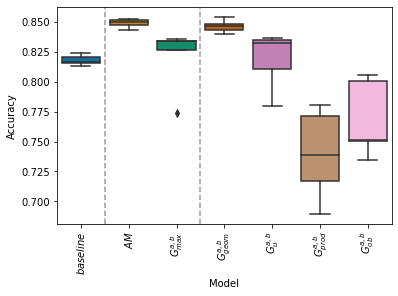

In [7]:
fig = plt.figure()
ax = sns.boxplot(data=df.T, palette='colorblind')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.4)
plt.axvline(x=2.5, color='black', linestyle='--', alpha=0.4)
# plt.axvline(x=9.5, color='black', linestyle='--', alpha=0.4)
# plt.axvline(x=14.5, color='black', linestyle='--', alpha=0.4)

### VGGNet

In [5]:
data_resnet = [
    [r'$AM$', 0.8427, 0.8451, 0.8551, 0.8449, 0.8479, 0.8461, 0.8487, 0.8509, 0.8472, 0.8449],
    [r'$G_{max}^{a,b}$', 0.8307, 0.8417, 0.8363, 0.8342, 0.841, 0.8331, 0.8338, 0.8394, 0.8417, 0.83],
    [r'$G_{geom}^{a,b}$', 0.8429, 0.8443, 0.8458, 0.845, 0.8417, 0.8435, 0.8413, 0.8416, 0.8396, 0.848],
    [r'$G_{u}^{a,b}$', 0.84, 0.8413, 0.8401, 0.8326, 0.838, 0.8249, 0.8406, 0.839, 0.8404, 0.8428],
    [r'$G_{prod}^{a,b}$', 0.8401, 0.844, 0.8453, 0.8373, 0.8474, 0.8508, 0.8496, 0.8426, 0.8474, 0.8409],
    [r'$G_{ob}^{a,b}$', 0.8463, 0.8517, 0.8473, 0.8408, 0.8431, 0.8438, 0.8488, 0.8459, 0.8437, 0.8488]
]

df = pd.DataFrame(data=data_resnet, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df = df.set_index('Model')

print(df)

                   Test1   Test2   Test3   Test4   Test5   Test6   Test7  \
Model                                                                      
$AM$              0.8427  0.8451  0.8551  0.8449  0.8479  0.8461  0.8487   
$G_{max}^{a,b}$   0.8307  0.8417  0.8363  0.8342  0.8410  0.8331  0.8338   
$G_{geom}^{a,b}$  0.8429  0.8443  0.8458  0.8450  0.8417  0.8435  0.8413   
$G_{u}^{a,b}$     0.8400  0.8413  0.8401  0.8326  0.8380  0.8249  0.8406   
$G_{prod}^{a,b}$  0.8401  0.8440  0.8453  0.8373  0.8474  0.8508  0.8496   
$G_{ob}^{a,b}$    0.8463  0.8517  0.8473  0.8408  0.8431  0.8438  0.8488   

                   Test8   Test9  Test10  
Model                                     
$AM$              0.8509  0.8472  0.8449  
$G_{max}^{a,b}$   0.8394  0.8417  0.8300  
$G_{geom}^{a,b}$  0.8416  0.8396  0.8480  
$G_{u}^{a,b}$     0.8390  0.8404  0.8428  
$G_{prod}^{a,b}$  0.8426  0.8474  0.8409  
$G_{ob}^{a,b}$    0.8459  0.8437  0.8488  


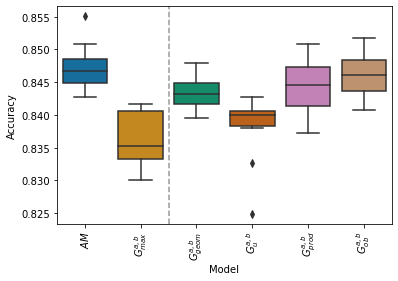

In [7]:
fig = plt.figure()
ax = sns.boxplot(data=df.T, palette='colorblind')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

plt.axvline(x=1.5, color='black', linestyle='--', alpha=0.4)
# plt.axvline(x=9.5, color='black', linestyle='--', alpha=0.4)
# plt.axvline(x=14.5, color='black', linestyle='--', alpha=0.4)